# Practice 1 ( until 2016-10-01 09:00 )
### 1.	Crime.csv는 2005년 미국의 범죄율 데이터로 범죄 유형별 발생건을 인구 100,000명 중의 발생 비율로 표시하였다. 살인, 강도, 폭행, 절도 등 총 7가지 범죄를 포함하는데 이 중 살인(murder)와 절도(burglary) 사이의 관계를 살피려고 한다. 
 - A.	두 변수 사이의 산점도를 단변량 분포와 함께 그리시오. 상관계수도 함께 살피시오.
 - B.	위를 통해 이상점 존재여부를 판단하고 존재한다면 해당 주를 확인하고 제거하시오. 제거 후 변수들 사이의 관계가 어떻게 변화하는지 살피시오.
 - C.	살인, 절도와 인구(population)의 관계를 함께 관찰하기 위해 bubble plot을 그리고 관찰한 사실을 기술하시오.
 - D.	7가지 범죄의 발생 건수를 heatmap으로 표현하고 범죄 발생 특징 간의 패턴이 비슷한 주들이 있는지 살피시오.

In [9]:
Crime <- read.csv("../0910/crime.csv",stringsAsFactors=F)

In [23]:
head(Crime)

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
1,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7,295753151
2,Alabama,8.2,34.3,141.4,247.8,953.8,2650,288.3,4545049
3,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391,669488
4,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
5,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221
6,California,6.9,26,176.1,317.3,693.3,1916.5,712.8,35795255


In [24]:
library(psych)

#### A. 두 변수 사이의 산점도를 단변량 분포와 함께 그리시오. 상관계수도 함께 살피시오.
 - $ Murder ~ Burglary  : cor = 0.28 $

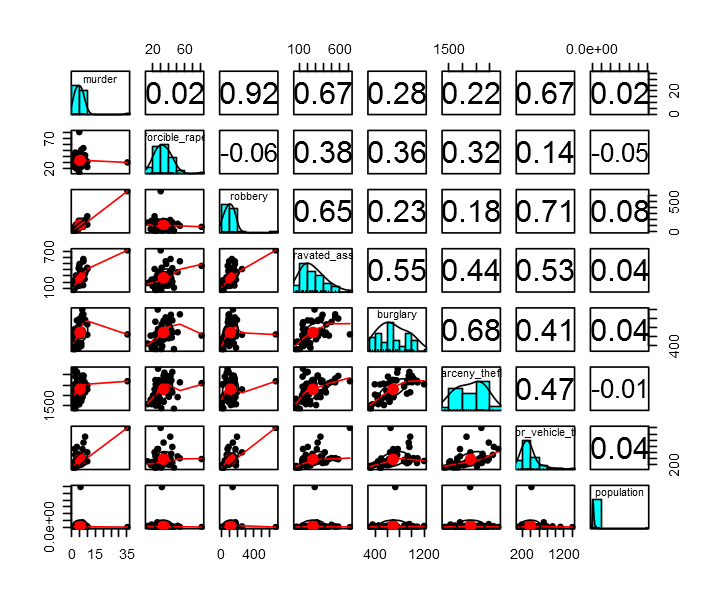

In [11]:
pairs.panels(Crime[,-1])

#### B. 위를 통해 이상점 존재여부를 판단하고 존재한다면 해당 주를 확인하고 제거하시오. 제거 후 변수들 사이의 관계가 어떻게 변화하는지 살피시오.
 - 우선 각 그래프를 보더라도 1개 이상의 이상 점이 존재하는 것으로 보인다.

[1] 10

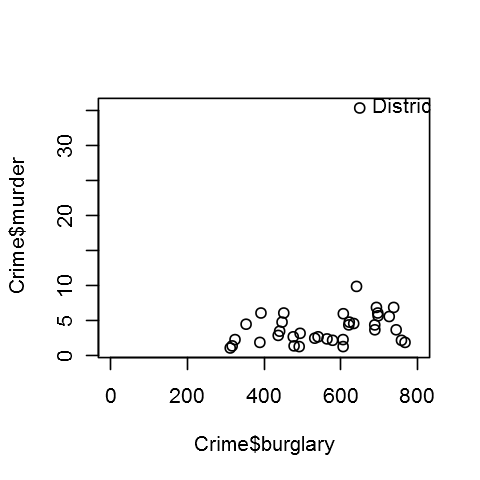

In [21]:
plot(Crime$burglary, Crime$murder,xlim=c(0,800))
identify(Crime$burglary,Crime$murder,labels=Crime$state)

 - District of Columbia : $ Row number = 10 $ 가 이상치 
 - 이상치 데이터 $ District of Columbia $ 와 전체 데이터인 $ United States $ 를 pairs 에서 다른 기호와 색으로 표시하여 그리기 

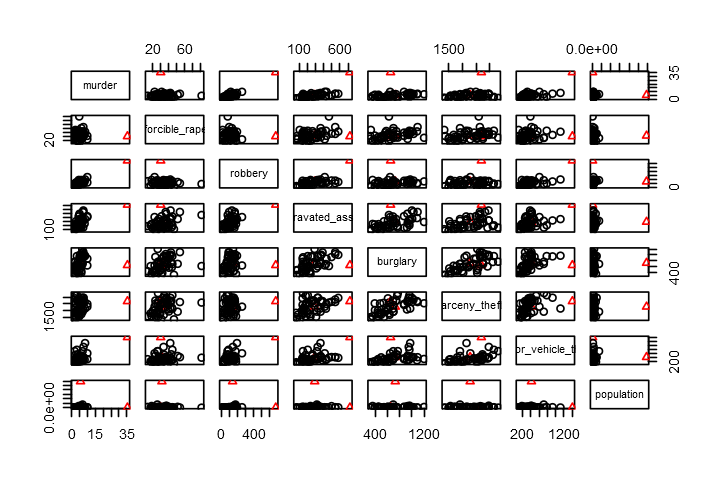

In [21]:
out=match(c("United States","District of Columbia"),Crime$state)
clr=rep(1,dim(Crime)[1])
clr[out]=2
pairs(Crime[,-1],col=clr,pch=clr)

#### 이상치 제거 후 $Cor$ 확인 
 - $ Murder ~ Burglary  : cor = 0.62 $  

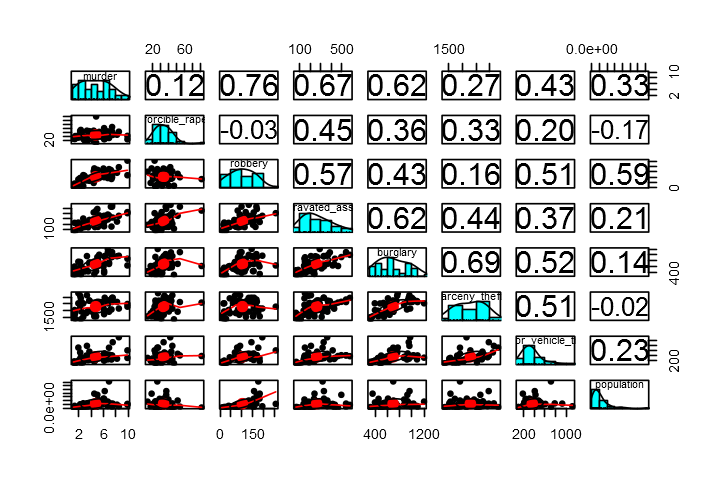

In [22]:
Crime2<-Crime[-out,] # 이상치 제거 
pairs.panels(Crime2[,-1])   # cor: 0.62

#### C. 살인, 절도와 인구(population)의 관계를 함께 관찰하기 위해 bubble plot을 그리고 관찰한 사실을 기술하시오.
 - 인구가 많을 수록 살인과 강도가 많은 경우가 발생하나 무조건 적인지는 않다. 
  - 인구가 가장 많다고 해서 살인과 강도가 가장 많이 일어나는 것은 아니다. 

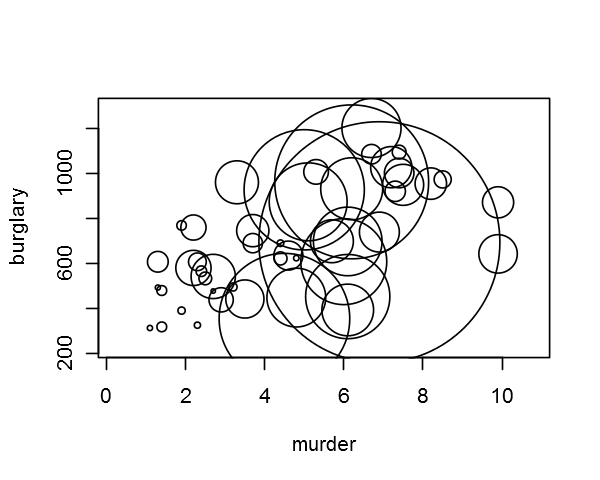

In [17]:
with(Crime2, symbols(murder,burglary,circles = population)) 

#### D. 7가지 범죄의 발생 건수를 heatmap으로 표현하고 범죄 발생 특징 간의 패턴이 비슷한 주들이 있는지 살피시오.
 - burglary 와 Murder 관계 외 forible_rape 과 murder에서의 이상점 ( alasaka 도 삭제)

[1] 2

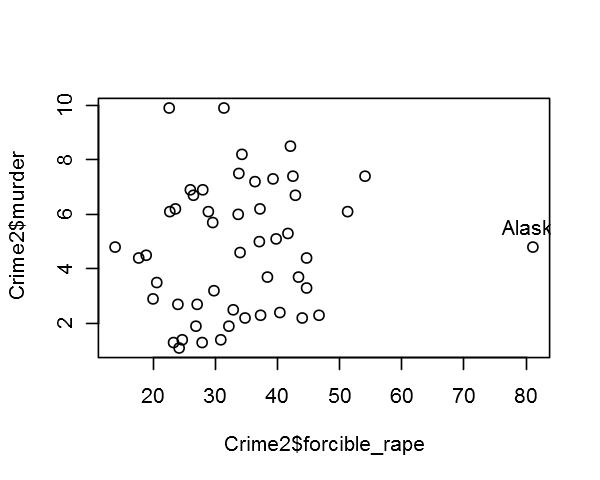

In [33]:
plot(Crime2$forcible_rape, Crime2$murder)
identify(Crime2$forcible_rape,Crime2$murder,labels=Crime2$state)

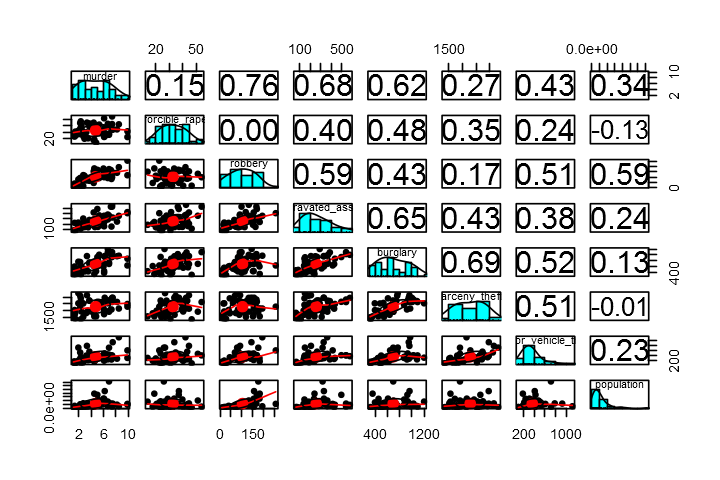

In [18]:
out=match(c("United States","Alaska","District of Columbia"),Crime$state)
Crime3 <- Crime[-out,]
pairs.panels(Crime3[,-1])

In [5]:
library(RColorBrewer)

In [19]:
TmpCrime <- Crime3
rownames(TmpCrime) <- Crime3[,1]
TmpCrime <- TmpCrime[,-1]
TmpCrime <- as.matrix(TmpCrime)

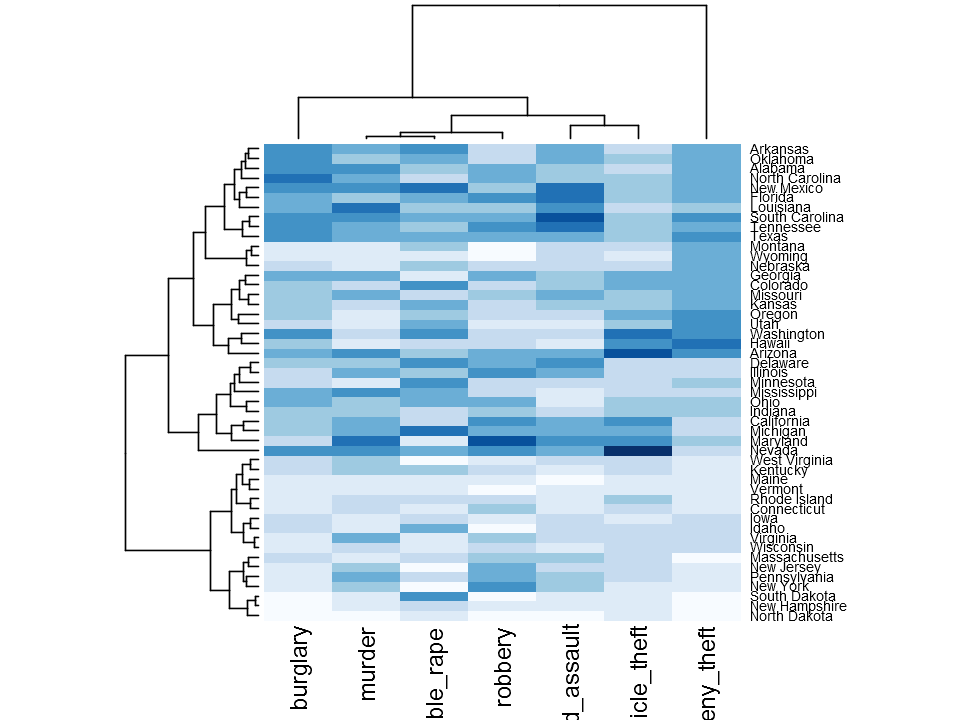

In [40]:
heatmap(TmpCrime[,-8], scale="column", col=brewer.pal(9,"Blues"))

 - 기준은 나누기 마다 달라지므로 자신의 기준에 맞춰서 나누면 될 것 같습니다.
![나누기](practice/2.PNG)

### 2.	Baseball_201509.csv는 2015년 9월 현재 한국 프로야구 각 팀의 성적을 보여준다. 이 자료를 이용해 별그림, 나이팅게일 차트를 적절한 label을 포함하여 그리고 비슷한 패턴을 가지는 그룹으로 나누어 각 그룹이 어떤 변수적 특징을 가지는지 서술하여라.

In [20]:
baseball <- read.csv("../0910/baseball_201509.csv")
rownames(baseball) <- baseball[,1]
baseball <- baseball[,-1]

#### 1) Nightingale's Chart
 - star <- stars(baseball,cex=0.7, draw.segments = TRUE) 
 - max(star['Var1']), min(star['Var2']) # 6.9 2.3 를 통해 최대값과 최소값을 구하여 key.loc 지정

In [ ]:
stars(baseball,cex=0.7, key.loc=c(8,2),draw.segments = TRUE)

<img src="practice/3.PNG" width="600">

In [ ]:
stars(baseball,cex=0.7, key.loc=c(8,2))

<img src="practice/4.PNG" width="600">

#### 비슷한 패턴을 가지는 그룹

In [ ]:
tmpBase <- as.matrix(baseball)
heatmap(tmpBase, scale="column", col=brewer.pal(9,"Blues"))

<img src="practice/5.png" width="700">